# Reverse Engineering API


## To do:
[] plantuml png handmatig => automatisch <br>

## Contents:
1. Basic info of the API and inspection
2. Getting the paths and endpoints
3. Getting the objects with attributes
4. Writing it to json, plantuml and .csv

## 1. Basic info of the API and inspection

In [93]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\da_api'

In [94]:
import glob
my_jsons=glob.glob('C:\\Users\\31653\\Desktop\\DeAlliantie\**\*.json')
my_yamls = glob.glob('*.yaml')
my_jsons, my_yamls
my_jsons.sort(key=os.path.getmtime, reverse=True)
print("\n".join(my_jsons))

C:\Users\31653\Desktop\DeAlliantie\DA API Integratiehub\relatieoverzicht-api.json
C:\Users\31653\Desktop\DeAlliantie\DA API Integratiehub\relatiestatus-api.json
C:\Users\31653\Desktop\DeAlliantie\DA API Integratiehub\relatie-naw-api.json
C:\Users\31653\Desktop\DeAlliantie\DA API Integratiehub\leefbaarheidsmelding-api.json
C:\Users\31653\Desktop\DeAlliantie\DA API Integratiehub\contactmoment-api.json
C:\Users\31653\Desktop\DeAlliantie\Saxton.postman_collection.json\Saxton.postman_collection.json
C:\Users\31653\Desktop\DeAlliantie\VERA\onderhoudsverzoeken-api.json
C:\Users\31653\Desktop\DeAlliantie\VERA\serviceovereenkomsten-api.json


In [95]:
#loading the API into active dictionary
import json

with open(r'C:\Users\31653\Desktop\DeAlliantie\DA API Integratiehub\leefbaarheidsmelding-api.json') as f:
    spec = json.load(f)
list(spec)

['swagger',
 'info',
 'host',
 'tags',
 'schemes',
 'paths',
 'definitions',
 'security',
 'securityDefinitions',
 'basePath']

In [96]:
#version is too long and missing a 'v'
API_version =spec['info']['version']
API_version = "v"+API_version[:5]
OAS_version =spec['swagger']
API_name = spec['info']['title']
API_name = API_name.replace(" ", "_")
print("OAS:", OAS_version, API_name, API_version)

OAS: 2.0 leefbaarheidsmelding-api v1.0.3


## 2. Getting the paths and endpoints

In [97]:
paths =list(spec['paths'])
print(len(paths))
paths

1


['/v1/meldingen/leefbaarheidsmelding']

In [98]:
endpoints_dict = {}
for i in range (len(paths)):
    endpoints_dict[paths[i]]=list(spec['paths'][paths[i]])
endpoints_dict

{'/v1/meldingen/leefbaarheidsmelding': ['post', 'put']}

## 3. Getting the objects

In [99]:
#inspection of the objects
spec['definitions']

{'Eenheid': {'type': 'object',
  'properties': {'adres': {'$ref': '#/definitions/Adres'}}},
 'Leefbaarheidsmelding': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'},
   'registratiedatum': {'type': 'string', 'format': 'date-time'},
   'omschrijving': {'type': 'string'},
   'toelichting': {'type': 'string'},
   'type': {'type': 'string'},
   'onderwerp': {'type': 'string'},
   'status': {'type': 'string'},
   'reden': {'type': 'string'},
   'urgentie': {'type': 'string'},
   'verantwoordelijkeMedewerker': {'type': 'string'},
   'relatieIdentificatie': {'type': 'string'},
   'rolRelatie': {'type': 'string'},
   'eenheid': {'$ref': '#/definitions/Eenheid'}}},
 'Adres': {'type': 'object',
  'properties': {'huisnummer': {'type': 'integer', 'format': 'int32'},
   'huisnummerToevoeging': {'type': 'string'},
   'postcode': {'type': 'string'}}},
 'ErrorResponse': {'type': 'object',
  'properties': {'timestamp': {'type': 'integer', 'format': 'int64'},
   'status': {'type'

In [100]:
objects = list(spec['definitions'])
print(len(objects))
objects

4


['Eenheid', 'Leefbaarheidsmelding', 'Adres', 'ErrorResponse']

In [101]:
#creating a dictionary with objects and their properties
object_dict ={}
objects = list(spec['definitions'])
for i in range (len(objects)):
    try:
        object_dict[objects[i]]=list(spec['definitions'][objects[i]]['properties'])#['properties']
    except:
        pass
object_dict

{'Eenheid': ['adres'],
 'Leefbaarheidsmelding': ['identificatie',
  'registratiedatum',
  'omschrijving',
  'toelichting',
  'type',
  'onderwerp',
  'status',
  'reden',
  'urgentie',
  'verantwoordelijkeMedewerker',
  'relatieIdentificatie',
  'rolRelatie',
  'eenheid'],
 'Adres': ['huisnummer', 'huisnummerToevoeging', 'postcode'],
 'ErrorResponse': ['timestamp', 'status', 'code', 'error', 'message']}

In [102]:
#converting the python dict to a JSON 
import json 
      
# Serializing json  
json_object = json.dumps(object_dict, indent = 4) 
print(json_object)

{
    "Eenheid": [
        "adres"
    ],
    "Leefbaarheidsmelding": [
        "identificatie",
        "registratiedatum",
        "omschrijving",
        "toelichting",
        "type",
        "onderwerp",
        "status",
        "reden",
        "urgentie",
        "verantwoordelijkeMedewerker",
        "relatieIdentificatie",
        "rolRelatie",
        "eenheid"
    ],
    "Adres": [
        "huisnummer",
        "huisnummerToevoeging",
        "postcode"
    ],
    "ErrorResponse": [
        "timestamp",
        "status",
        "code",
        "error",
        "message"
    ]
}


## 4. Writing it to a .json, plantuml and .csv file

In [103]:
#writing it to a json
import json
with open(API_name+'_data.json', 'w', encoding='utf-8') as f:
    json.dump(json_object, f, ensure_ascii=False, indent=4)

In [104]:
import glob
my_jsons = glob.glob('*.json')
my_jsons

['inspectieorders-api_data.json',
 'leefbaarheidsmelding-api_data.json',
 'onderhoudsverzoeken-api_data.json',
 'planningsverzoeken-api.json',
 'planningsverzoeken-api_data.json',
 'relatie-naw-api_data.json',
 'relatieoverzicht-api_data.json',
 'relatiestatus-api_data.json',
 'Relatie_Contactmoment_API_data.json']

In [105]:
textfile = open("plantuml_"+API_name+"_data.txt", "w")
textfile.write('@startuml\n')
for key, value in object_dict.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
textfile.write('@enduml')
textfile.close()

In [106]:
import glob
my_txts = glob.glob('*.txt')
my_txts
import glob
import os

#files = glob.glob("*cycle*.log")
my_txts.sort(key=os.path.getmtime, reverse=True)
print("\n".join(my_txts))
print("The last one is: "+my_txts[0])

plantuml_leefbaarheidsmelding-api_data.txt
plantuml_relatie-naw-api_data.txt
plantuml_relatiestatus-api_data.txt
plantuml_relatieoverzicht-api_data.txt
plantuml_Relatie_Contactmoment_API_data.txt
plantuml_inspectieorders-api_data.txt
onderhoudsverzoeken-api_API_plantuml.txt
plantuml_planningsverzoeken-api_data.txt
plantuml_planningsverzoeken.txt
The last one is: plantuml_leefbaarheidsmelding-api_data.txt


In [49]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\da_api\\plantuml_relatieoverzicht-api_data.txt

In [107]:
#convert the txt file to an .png image using plantuml
!python -m plantuml plantuml_leefbaarheidsmelding-api_data.txt

[{'filename': 'plantuml_leefbaarheidsmelding-api_data.txt', 'gen_success': True}]


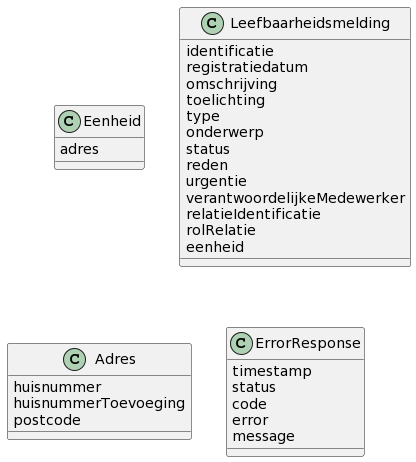

In [108]:
#show the generated png
from IPython import display
display.Image(filename="plantuml_leefbaarheidsmelding-api_data.png", width=1200, height=500)

## Write it to a .csv file

 a .csv file with a ; seperator between key and values

In [109]:
with open(API_name+"_data.csv", mode="w") as pv:
    for key, value in object_dict.items():
        pv.write(str(key)+";")
        for i in range (len(value)-1):
            pv.write(value[i]+",")#write values + a comma  
        pv.write(value[-1]+"\n") #write last value (and no comma) 

In [110]:
import glob
my_csvs=glob.glob('*.csv')
my_csvs

['inspectieorders-api_data.csv',
 'leefbaarheidsmelding-api_data.csv',
 'onderhoudsverzoeken-api_data.csv',
 'planningsverzoeken-api_data.csv',
 'relatie-naw-api_data.csv',
 'relatieoverzicht-api_data.csv',
 'relatiestatus-api_data.csv',
 'Relatie_Contactmoment_API_data.csv']

In [27]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\inspectieorders-api_data.csv